<a href="https://colab.research.google.com/github/M-G-C-64/Temperature-Predictor/blob/main/Base_line.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [133]:
my_colors = ['red', 'green', 'blue', 'black', 'yellow', 'pink', 'gray']


<h1 style="font-size:40px;">
<font face="Britannic">
Temperature Predictor
<h1>
<style>
    h1 {text-align:start;}
<style>

<h1 style="color:Salmon;font-size:30px;">
<font face="Arial rounded mt">
Importing<br>
<h3 style="color:lightgreen;font-size:20px;">
<font face="candara">
Pandas<br>
Numpy<br>
Plotly.express<br>
Seaborn<br>

In [134]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

<h1 style="color:Salmon;font-size:30px;">
<font face="arial rounded mt">
Reading
<h3 style="color:lightgreen;font-size:20px;">
<font face="candara">
pd.read_csv()

In [135]:
global_temp=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/Time_Series/dataset/GlobalTemperatures.csv')
global_temp.head()


,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [136]:
def fetch_year(date):
    return date.split('-')[0]


<b style="font-size:18px;">
Added 'years' column

In [137]:
global_temp['years']=global_temp['dt'].apply(fetch_year)
global_temp.head()


,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750



### **New dataframe 'data' for every year and their corresponding average temperature and average uncertainity**

In [138]:
data=global_temp.groupby('years').agg({'LandAverageTemperature':'mean','LandAverageTemperatureUncertainty':'mean'}).reset_index()
data.head()


,years,LandAverageTemperature,LandAverageTemperatureUncertainty
0,1750,8.719364,2.637818
1,1751,7.976143,2.781143
2,1752,5.779833,2.977000
3,1753,8.388083,3.176000
4,1754,8.469333,3.494250


In [139]:
data['Uncertainity_top']=data['LandAverageTemperature'] + data['LandAverageTemperatureUncertainty']
data['Uncertainity_bottom']=data['LandAverageTemperature'] - data['LandAverageTemperatureUncertainty']
print(data.head())
data.tail()


  years  LandAverageTemperature  ...  Uncertainity_top  Uncertainity_bottom
0  1750                8.719364  ...         11.357182             6.081545
1  1751                7.976143  ...         10.757286             5.195000
2  1752                5.779833  ...          8.756833             2.802833
3  1753                8.388083  ...         11.564083             5.212083
4  1754                8.469333  ...         11.963583             4.975083

[5 rows x 5 columns]


,years,LandAverageTemperature,LandAverageTemperatureUncertainty,Uncertainity_top,Uncertainity_bottom
261,2011,9.516000,0.082000,9.598000,9.434000
262,2012,9.507333,0.083417,9.590750,9.423917
263,2013,9.606500,0.097667,9.704167,9.508833
264,2014,9.570667,0.090167,9.660833,9.480500
265,2015,9.831000,0.092167,9.923167,9.738833


<b style="font-size:20px;">
Plotly graphs were not able to render by github here is an alternative using matplotlib

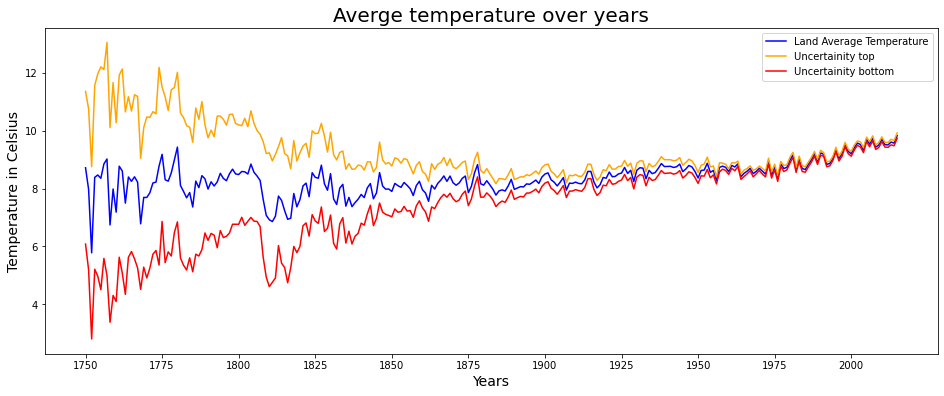

In [140]:
plt.figure(figsize=(16,6))

plt.plot(data['years'],data['LandAverageTemperature'],color='b')
plt.plot(data['years'],data['Uncertainity_top'], color='orange')
plt.plot(data['years'],data['Uncertainity_bottom'], color='red')

ticks = []
for x in range(11):
    ticks.append(x*25)

myfont = {'family':'Arial', 'color':'black', 'size':14}
myfontbig = {'family':'Lucida console', 'color':'black', 'size':20}

plt.legend(['Land Average Temperature','Uncertainity top','Uncertainity bottom'])
plt.xticks(ticks)
plt.title('Averge temperature over years', fontdict=myfontbig)
plt.xlabel('Years', fontdict=myfont)
plt.ylabel('Temperature in Celsius', fontdict=myfont)
plt.show()

We can see from the graph that the average temperature has been rising from the year 1975, which indicates the presence of global warming

## **Analyse Average temperature in Season**

In [141]:
global_temp['dt'] = pd.to_datetime(global_temp['dt'])
global_temp.dtypes

dt                                           datetime64[ns]
LandAverageTemperature                              float64
LandAverageTemperatureUncertainty                   float64
LandMaxTemperature                                  float64
LandMaxTemperatureUncertainty                       float64
LandMinTemperature                                  float64
LandMinTemperatureUncertainty                       float64
LandAndOceanAverageTemperature                      float64
LandAndOceanAverageTemperatureUncertainty           float64
years                                                object
dtype: object

In [142]:
global_temp['month'] = global_temp['dt'].dt.month
global_temp.sample(5)


,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years,month
120,1760-01-01,-0.811,4.567,NaN,NaN,NaN,NaN,NaN,NaN,1760,1
350,1779-03-01,6.967,3.017,NaN,NaN,NaN,NaN,NaN,NaN,1779,3
484,1790-05-01,10.357,1.057,NaN,NaN,NaN,NaN,NaN,NaN,1790,5
1813,1901-02-01,3.092,0.418,9.038,0.371,-2.678,0.539,13.660,0.163,1901,2
1424,1868-09-01,11.669,0.418,17.988,0.799,5.726,0.690,16.107,0.217,1868,9


In [143]:
def get_season(month):
    if month >= 3 and month <= 5:
        return 'spring'
    elif month >= 6 and month <= 8:
        return 'summer'
    elif month >= 9 and month <= 11:
        return 'autumn'
    else:
        return 'winter' 


In [144]:
global_temp['season'] = global_temp['month'].apply(get_season)
global_temp.sample(5)


,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years,month,season
3029,2002-06-01,14.084,0.052,19.912,0.143,8.184,0.151,17.110,0.060,2002,6,summer
2014,1917-11-01,5.820,0.226,11.686,0.253,0.057,0.266,14.002,0.138,1917,11,autumn
2827,1985-08-01,14.059,0.087,19.757,0.113,8.515,0.092,17.013,0.050,1985,8,summer
1671,1889-04-01,8.589,0.332,14.392,0.519,2.502,0.510,15.305,0.146,1889,4,spring
2718,1976-07-01,14.155,0.180,19.852,0.245,8.349,0.221,16.864,0.073,1976,7,summer


In [145]:
uniq_years = global_temp['years'].unique()
uniq_years


array(['1750', '1751', '1752', '1753', '1754', '1755', '1756', '1757',
       '1758', '1759', '1760', '1761', '1762', '1763', '1764', '1765',
       '1766', '1767', '1768', '1769', '1770', '1771', '1772', '1773',
       '1774', '1775', '1776', '1777', '1778', '1779', '1780', '1781',
       '1782', '1783', '1784', '1785', '1786', '1787', '1788', '1789',
       '1790', '1791', '1792', '1793', '1794', '1795', '1796', '1797',
       '1798', '1799', '1800', '1801', '1802', '1803', '1804', '1805',
       '1806', '1807', '1808', '1809', '1810', '1811', '1812', '1813',
       '1814', '1815', '1816', '1817', '1818', '1819', '1820', '1821',
       '1822', '1823', '1824', '1825', '1826', '1827', '1828', '1829',
       '1830', '1831', '1832', '1833', '1834', '1835', '1836', '1837',
       '1838', '1839', '1840', '1841', '1842', '1843', '1844', '1845',
       '1846', '1847', '1848', '1849', '1850', '1851', '1852', '1853',
       '1854', '1855', '1856', '1857', '1858', '1859', '1860', '1861',
      

In [146]:
spring_list = []
summer_list = []
autumn_list = []
winter_list = []


In [147]:
for year in uniq_years:
    yearly_temp = global_temp[global_temp['years']==year]
    spring_list.append(yearly_temp[yearly_temp['season']=='spring']['LandAverageTemperature'].mean())
    summer_list.append(yearly_temp[yearly_temp['season']=='summer']['LandAverageTemperature'].mean())
    autumn_list.append(yearly_temp[yearly_temp['season']=='autumn']['LandAverageTemperature'].mean())
    winter_list.append(yearly_temp[yearly_temp['season']=='winter']['LandAverageTemperature'].mean())


In [148]:
season = pd.DataFrame()
season['year'] = uniq_years
season['spring_temp'] = spring_list
season['summer_temp'] = summer_list
season['autumn_temp'] = autumn_list
season['winter_temp'] = winter_list
season.head()


,year,spring_temp,summer_temp,autumn_temp,winter_temp
0,1750,8.563000,14.518333,8.890000,2.963000
1,1751,6.735000,14.116000,10.673000,1.729000
2,1752,7.035500,NaN,7.587000,2.717000
3,1753,8.627333,14.608333,9.212333,1.104333
4,1754,9.074333,14.208333,8.957333,1.637333


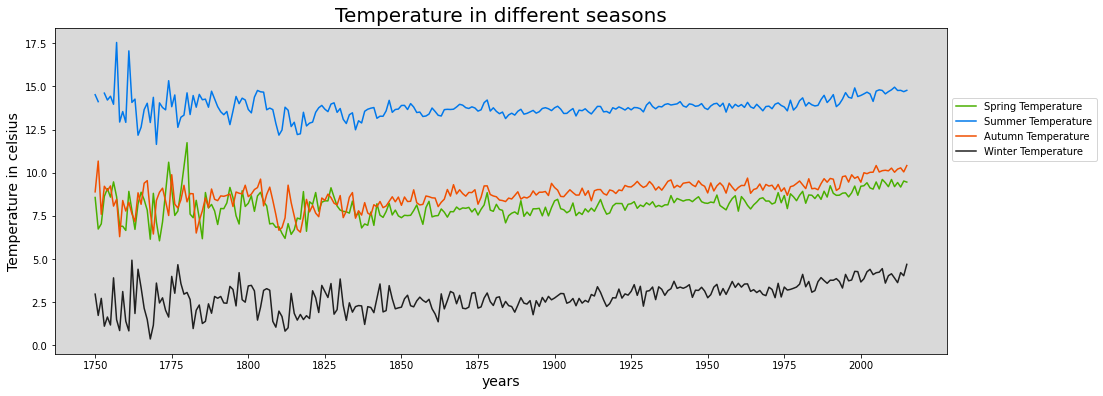

In [149]:
f = plt.figure(figsize=(16,6))

ax = plt.axes()
ax.set_facecolor('#D9D9D9')

plt.plot(season['year'],season['spring_temp'], color = '#49AF00')
plt.plot(season['year'],season['summer_temp'], color = '#0078EB')
plt.plot(season['year'],season['autumn_temp'], color = '#F04F00')
plt.plot(season['year'],season['winter_temp'], color = '#202020')

ticks = []
for i in range(11):
    ticks.append(i*25)

plt.legend(['Spring Temperature','Summer Temperature', 'Autumn Temperature', 'Winter Temperature'], 
bbox_to_anchor = (1,0.8))

plt.xticks(ticks=ticks)
plt.title('Temperature in different seasons', fontdict=myfontbig)
plt.xlabel('years', fontdict=myfont)
plt.ylabel('Temperature in celsius', fontdict=myfont)
plt.show()

<h2 style="font-size:25px;color:lightpink">
Pre-processing

In [150]:
cityData = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/Time_Series/dataset/GlobalLandTemperaturesByCity.csv')
cityData.head()


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [151]:
cityData.shape

(8599212, 7)

In [152]:
uscit = cityData[cityData['Country'] == 'United States']
uscit.sample(5)


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
7392934,1797-11-01,14.189,2.669,Tallahassee,United States,29.74N,84.92W
8162585,1801-01-01,-0.398,2.302,Washington,United States,39.38N,76.99W
2660495,1996-11-01,7.145,0.091,Greensboro,United States,36.17N,79.56W
3896703,1938-10-01,13.889,0.448,Knoxville,United States,36.17N,83.54W
8201725,1876-08-01,22.159,1.265,West Jordan,United States,40.99N,112.90W


In [153]:
ind = cityData[cityData['Country'] == 'India']
ind.head()


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
49880,1816-03-01,19.934,2.258,Abohar,India,29.74N,73.85E
49881,1816-04-01,26.641,3.398,Abohar,India,29.74N,73.85E
49882,1816-05-01,32.535,2.408,Abohar,India,29.74N,73.85E
49883,1816-06-01,33.254,2.123,Abohar,India,29.74N,73.85E
49884,1816-07-01,31.105,1.848,Abohar,India,29.74N,73.85E


In [154]:
tricities = ['Vizianagaram', 'Bangalore', 'Mirzapur']
TriCity = ind[ind['City'].isin(tricities)]
print(TriCity.sample(5))

ustricities = ['New York', 'Los Angeles', 'San Francisco']
ustricit = uscit[uscit['City'].isin(ustricities)]
print(ustricit.sample(5))


                 dt  AverageTemperature  ...  Latitude Longitude
4851433  1849-12-01              14.698  ...    24.92N    83.35E
631583   1918-07-01              25.230  ...    12.05N    77.26E
4851358  1843-09-01              27.535  ...    24.92N    83.35E
4850858  1802-01-01              16.692  ...    24.92N    83.35E
632225   1972-01-01              22.086  ...    12.05N    77.26E

[5 rows x 7 columns]
                 dt  AverageTemperature  ...  Latitude Longitude
4356951  1865-12-01               7.016  ...    34.56N   118.70W
4357737  1931-06-01              20.334  ...    34.56N   118.70W
5204222  1764-08-01              20.419  ...    40.99N    74.56W
5206226  1931-08-01              21.866  ...    40.99N    74.56W
5206078  1919-04-01               8.327  ...    40.99N    74.56W

[5 rows x 7 columns]


In [155]:
TriCity = TriCity[['dt', 'AverageTemperature']]
print(TriCity.shape)
print(TriCity.sample(5))

ustricit = ustricit[['dt', 'AverageTemperature']]
print(ustricit.shape)
print(ustricit.sample(5))


(7839, 2)
                 dt  AverageTemperature
8086774  1835-04-01              27.514
631361   1900-01-01              23.390
8086327  1798-01-01              20.491
4852616  1948-07-01              29.175
631176   1884-08-01              24.312
(7193, 2)
                 dt  AverageTemperature
5207150  2008-08-01              20.887
6636996  1992-05-01              18.575
5204922  1822-12-01              -1.712
5206791  1978-09-01              16.487
5206338  1940-12-01               0.424


In [156]:
TriCity.columns = ['Date', 'Temp']
print(TriCity.sample(5))

ustricit.columns = ['uDate', 'uTemp']
ustricit.sample(5)

               Date    Temp
631119   1879-11-01  23.017
8087641  1907-07-01  26.245
8088718  1997-04-01  27.400
631765   1933-09-01  24.218
8087918  1930-08-01  26.003


,uDate,uTemp
5207067,2001-09-01,17.474
5204247,1766-09-01,18.632
4357200,1886-09-01,20.286
6635522,1869-07-01,20.175
5204046,1749-12-01,NaN


In [157]:
TriCity.dtypes

Date     object
Temp    float64
dtype: object

In [158]:
TriCity['Date'] = pd.to_datetime(TriCity['Date'])
print(TriCity.dtypes)

ustricit['uDate'] = pd.to_datetime(ustricit['uDate'])
print('\nus city date type',ustricit.dtypes)


Date    datetime64[ns]
Temp           float64
dtype: object

us city date type uDate    datetime64[ns]
uTemp           float64
dtype: object


In [159]:
print('indian null temp values\n',TriCity.isna().sum())
print('us null temp values\n',ustricit.isna().sum())


indian null temp values
 Date      0
Temp    320
dtype: int64
us null temp values
 uDate      0
uTemp    120
dtype: int64


In [160]:
TriCity.dropna(inplace=True)
print('ind',TriCity.shape)

ustricit.dropna(inplace=True)
print('us', ustricit.shape)


ind (7519, 2)
us (7073, 2)


In [161]:
print(TriCity.head())
TriCity.set_index('Date', inplace=True)
print(TriCity.head())

ustricit.set_index('uDate', inplace=True)
print(ustricit.sample(5))


             Date    Temp
630113 1796-01-01  22.672
630114 1796-02-01  24.420
630115 1796-03-01  26.092
630116 1796-04-01  27.687
630117 1796-05-01  27.619
              Temp
Date              
1796-01-01  22.672
1796-02-01  24.420
1796-03-01  26.092
1796-04-01  27.687
1796-05-01  27.619
             uTemp
uDate             
1954-04-01  10.454
2008-12-01   0.327
1846-08-01  21.460
1901-10-01  17.250
1938-12-01   9.810


<h1 style="color:Salmon;font-size:30px;">
<font face="arial rounded mt">
Stationery
<h3 style="color:lightgreen;font-size:20px;">
<font face="candara">
Mean and Standard deviation must be constant through out the data
<h3 style="color:#E0D0FF;font-size:20px;font-weight:bold">
<font face="candara">
Stationarity implies that taking consecutive samples of data with the same size should have identical covariances regardless of the starting point.


# **for Indian cities**

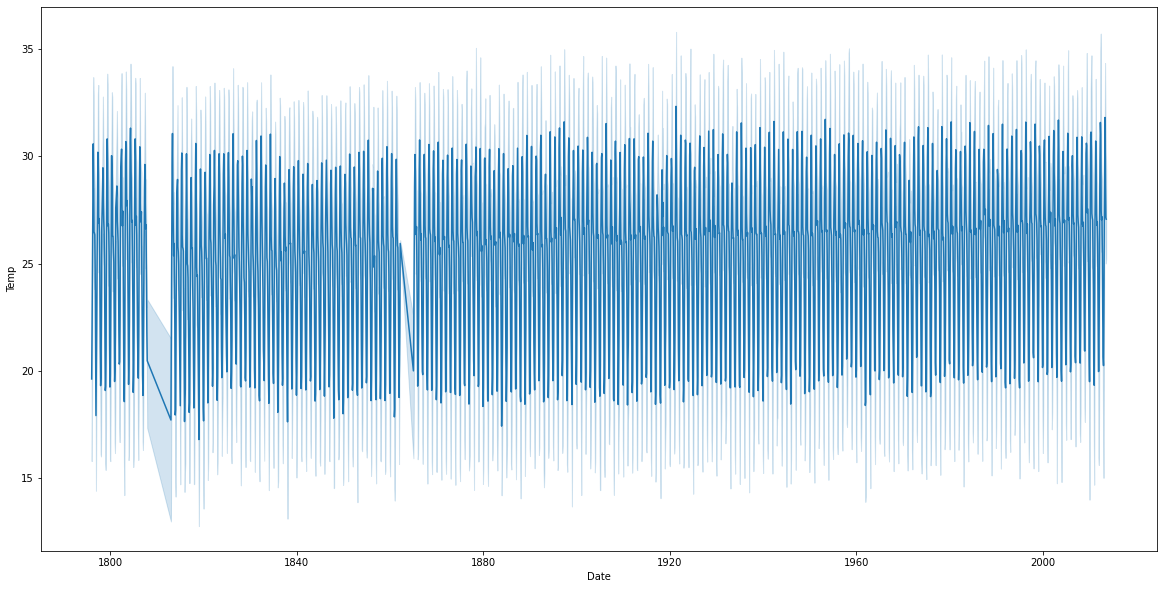

In [162]:
#Visualisation Technique
plt.figure(figsize=(20,10))
sns.lineplot(TriCity.index,TriCity['Temp'])
#indian three citites temperature is stationary

In [163]:
from statsmodels.tsa.stattools import adfuller

In [164]:
#Statistical test
adfuller(TriCity['Temp'])

(-6.103115440548745,
 9.727784533890254e-08,
 36,
 7482,
 {'1%': -3.431224304321935,
  '10%': -2.566975663650678,
  '5%': -2.861926376183738},
 19381.27165285415)

as the adfuller test values is less than 1% value, we can conclude that the data is stationary with a 99% certainity

In [165]:
def adfuller_test(data):
    result = adfuller(data)
    labels = ['ADF test stats', 'p-value', '#lags used', 'no of observations used']

    for val,lab in zip(result, labels):
        print(f'{lab} = {val}')
    print(result[4])

    if result[1] <= 0.05:
        print('\nThere is strong evidence against null hypothesis\n\
So we can reject the null hypothesis\nSo the data is stationery')
    else:
        print('\nThere is weak evidence against null hypothesis\n\
So we have failed to reject the null hypothesis\n\
So the data is not stationery')

In [166]:
adfuller_test(TriCity['Temp'])


ADF test stats = -6.103115440548745
p-value = 9.727784533890254e-08
#lags used = 36
no of observations used = 7482
{'1%': -3.431224304321935, '5%': -2.861926376183738, '10%': -2.566975663650678}

There is strong evidence against null hypothesis
So we can reject the null hypothesis
So the data is stationery



# **for US cities**

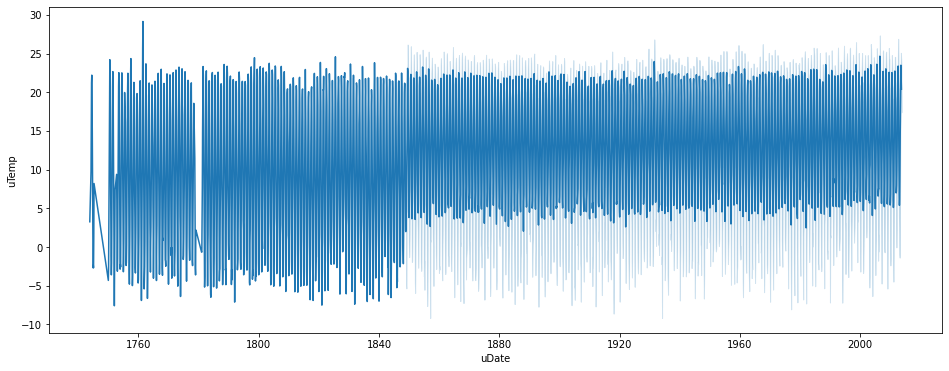

In [167]:
#Visualisation method
plt.figure(figsize=(16,6))
sns.lineplot(ustricit.index, ustricit['uTemp'])
# the data is not stationery as the line plot is not same length as it was in the indian cities plot

In [168]:
print(adfuller(ustricit['uTemp']))
print()
adfuller_test(ustricit['uTemp'])

(-2.0063893036758143, 0.28377865833331783, 35, 7037, {'1%': -3.431279613044704, '5%': -2.8619508146206374, '10%': -2.5669886726127307}, 28011.222669408726)

ADF test stats = -2.0063893036758143
p-value = 0.28377865833331783
#lags used = 35
no of observations used = 7037
{'1%': -3.431279613044704, '5%': -2.8619508146206374, '10%': -2.5669886726127307}

There is weak evidence against null hypothesis
So we have failed to reject the null hypothesis
So the data is not stationery


as the adfuller test value is greater than all of 1%, 5%, 10% we can say that the data is not stationary


### **converting the non stationery data into stationery data**

In [169]:
ustricit_copy = ustricit.copy()
ustricit_copy.sample(5)


,uTemp
uDate,
1978-07-01,21.578
1815-06-01,18.725
1952-08-01,19.175
1793-11-01,3.749
1930-03-01,3.001


In [170]:
ustricit_copy['uTemp'].shift(1)


uDate
1849-01-01       NaN
1849-02-01     8.819
1849-03-01     9.577
1849-04-01    11.814
1849-05-01    13.704
               ...  
2013-05-01    15.996
2013-06-01    17.434
2013-07-01    19.759
2013-08-01    20.657
2013-09-01    19.731
Name: uTemp, Length: 7073, dtype: float64

In [171]:
ustricit_copy['12_temp_diff'] = ustricit['uTemp'] - ustricit_copy['uTemp'].shift(12)
#shift by 12 because to rotate to one complete year
ustricit_copy.head(20)


,uTemp,12_temp_diff
uDate,,
1849-01-01,8.819,NaN
1849-02-01,9.577,NaN
1849-03-01,11.814,NaN
1849-04-01,13.704,NaN
1849-05-01,14.834,NaN
1849-06-01,21.173,NaN
1849-07-01,26.159,NaN
1849-08-01,26.099,NaN
1849-09-01,21.848,NaN


In [172]:
adfuller_test(ustricit_copy['12_temp_diff'].dropna())


ADF test stats = -21.239650404910893
p-value = 0.0
#lags used = 35
no of observations used = 7025
{'1%': -3.43128120157662, '5%': -2.8619515165147282, '10%': -2.566989046243082}

There is strong evidence against null hypothesis
So we can reject the null hypothesis
So the data is stationery


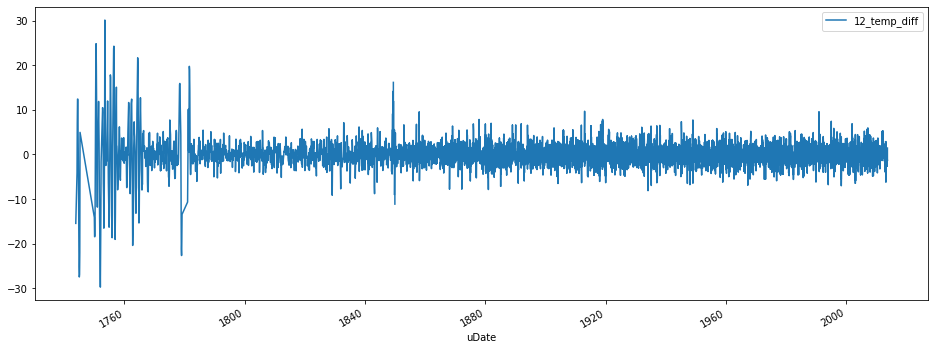

In [173]:
ustricit_copy[['12_temp_diff']].plot(figsize=(16,6))


<b style="font-size:22px;">
Seasonal temperature

In [174]:
TriCity['month'] = TriCity.index.month
TriCity['year'] = TriCity.index.year
TriCity.head()


,Temp,month,year
Date,,,
1796-01-01,22.672,1,1796
1796-02-01,24.420,2,1796
1796-03-01,26.092,3,1796
1796-04-01,27.687,4,1796
1796-05-01,27.619,5,1796


## **Seasonality** --------------------

In [175]:
pivTC = TriCity.pivot_table(values='Temp', index='month', columns='year')
pivTC

year,1796,1797,1798,1799,1800,1801,1802,1803,1804,1805,1806,1807,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835,1836,1837,1838,1839,1840,...,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,19.631333,NaN,19.729000,19.278667,19.770667,20.066333,20.434000,18.575000,20.406333,19.798000,19.668667,18.865000,17.719667,18.196000,18.385667,18.702333,18.526000,18.828333,16.810667,17.680667,19.902333,20.100333,19.729000,20.111000,19.961667,19.919000,20.322667,19.261667,19.539333,19.627667,19.212333,18.614667,19.552667,18.496333,19.423000,18.925333,19.655667,17.634667,19.917000,19.941333,...,19.317333,19.078333,19.020667,19.810000,19.464667,20.368000,20.337333,19.682333,20.438667,19.440000,20.161667,20.502333,19.593667,19.944333,20.365667,19.507000,20.552333,20.108333,19.217333,19.998333,20.499000,19.216667,20.662667,19.564000,20.619000,19.500667,20.279667,19.965667,20.442333,19.707333,19.527333,20.748667,20.325333,20.387000,20.368667,20.929000,19.506000,19.338333,19.996000,20.253667
2,22.014333,NaN,22.515667,20.977333,22.516000,21.694667,22.612333,21.295333,22.281333,21.936333,21.701667,21.221000,21.533000,21.351333,21.986333,19.147333,21.255333,21.163333,20.251000,20.358667,22.686000,23.414667,22.461667,22.309333,22.447000,21.463667,22.430333,21.853667,21.080667,22.291667,22.223667,20.996000,22.276667,22.012000,21.800333,21.468000,22.331000,21.144333,22.388333,22.151667,...,22.329333,22.743333,22.249333,22.869333,22.044667,22.375667,23.220667,23.027000,22.601333,22.806667,21.834667,22.783667,22.344333,22.577333,23.390667,22.404667,22.953667,23.570333,22.170667,22.799333,22.493000,22.722000,22.693000,22.171667,23.352000,23.514667,22.516000,23.538000,23.119333,23.703667,22.577667,23.504000,23.750000,22.721000,22.126333,23.940667,23.376000,22.686000,22.979000,23.074667
3,24.950667,25.563667,26.626000,25.720000,25.587333,27.591333,27.392333,25.953667,25.869333,26.391667,25.469333,NaN,24.350333,24.782000,24.756000,24.825333,24.872667,25.210667,24.773667,25.041667,26.432333,27.731333,25.971667,26.291667,26.063667,26.364333,26.504000,26.025333,25.821333,25.696000,26.331667,26.208000,25.731000,26.034667,24.946000,25.185667,25.316667,25.159333,24.809667,25.616000,...,27.076000,26.554333,26.595667,27.315667,25.586667,26.084000,26.808667,26.136333,26.028333,26.897000,26.365667,27.559667,26.539333,26.284333,27.009667,26.060333,25.904333,27.080333,26.682000,25.946333,27.146333,26.292000,27.066000,26.527333,26.103667,27.601667,26.273000,26.774000,27.204000,26.603000,27.548333,27.414667,26.379667,26.311333,26.260333,26.959000,28.269667,26.872333,26.939667,26.866667
4,28.827000,28.324000,NaN,29.421000,30.024000,NaN,29.479667,29.697000,30.592667,28.494667,28.858667,NaN,29.507667,28.195000,29.348667,27.726000,28.442333,28.921000,27.676333,29.074667,27.943000,28.617667,29.509000,29.177333,29.401000,29.515333,29.603333,28.672000,28.667000,28.936000,28.308667,29.370000,28.555333,28.236667,27.556667,28.129000,27.521333,28.834000,28.492333,28.758000,...,30.158333,29.947333,28.891000,29.130667,29.166667,29.641000,30.384000,29.437000,29.250667,29.141667,29.394000,30.111333,29.542667,29.716000,29.365667,29.467667,29.382000,29.402333,29.687667,29.182333,29.046667,29.395667,29.343667,27.932333,29.679667,30.475333,30.094000,29.092333,30.003333,30.014667,29.838333,29.340000,29.563667,29.659000,29.236000,30.117000,31.014667,28.671333,29.847000,29.762333
5,30.575000,30.184667,NaN,30.805333,30.014333,NaN,29.865333,30.681667,31.307667,30.806333,30.437000,28.427000,31.056333,NaN,30.149000,30.111333,29.005667,30.594000,29.405000,29.252333,30.078667,30.269667,30.113000,30.111000,30.169667,31.044667,29.791667,30.002000,30.267333,28.101667,30.732000,30.941667,29.591000,31

Text(0, 0.5, 'Temperature')

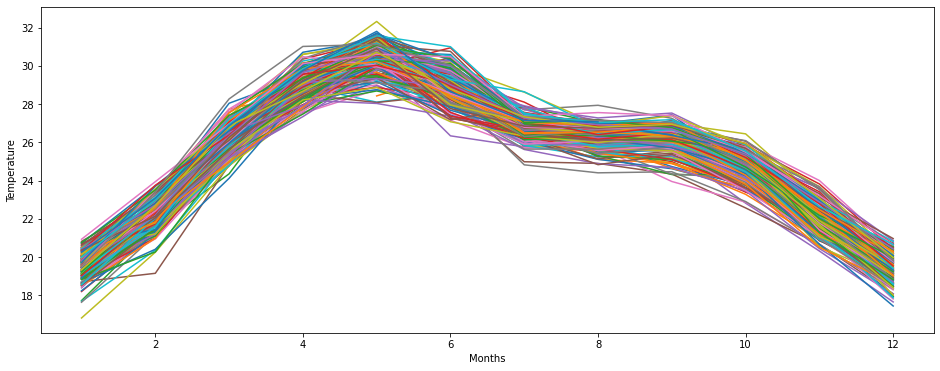

In [176]:
pivTC.plot(figsize=(16,6))
plt.legend().remove()
plt.xlabel('Months')
plt.ylabel('Temperature')


Text(0, 0.5, 'Temperature')

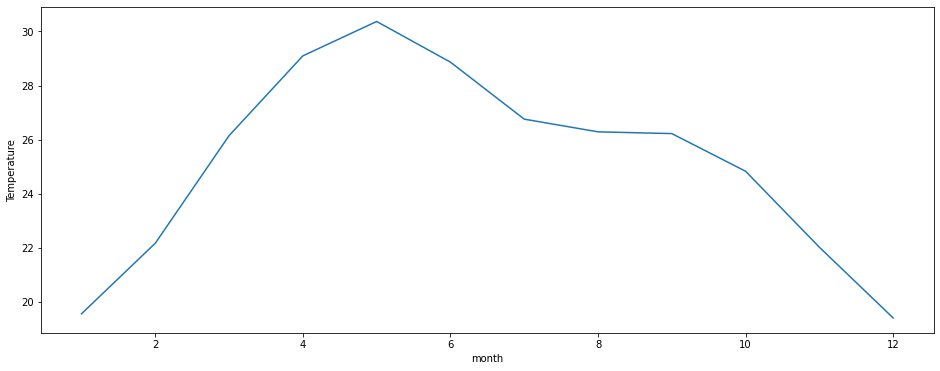

In [177]:
AvgMonthTemp = pivTC.mean(axis=1)
AvgMonthTemp.plot(figsize=(16,6))
plt.ylabel('Temperature')


## **Finding the moving average to remove the seasonality**

In [178]:
ustricit_copy = ustricit_copy[['12_temp_diff']]

In [179]:
ustricit_copy.head(20)

,12_temp_diff
uDate,
1849-01-01,NaN
1849-02-01,NaN
1849-03-01,NaN
1849-04-01,NaN
1849-05-01,NaN
1849-06-01,NaN
1849-07-01,NaN
1849-08-01,NaN
1849-09-01,NaN


In [180]:
ustricit_copy.dropna(inplace=True)

<b style="font-size:20px;">
building a timeseries model using moving average

In [181]:
print(ustricit_copy['12_temp_diff'].rolling(window=7).mean().head(15))
#gives mean for every 7 values like average temperature for 7 every months

print(ustricit_copy['12_temp_diff'].rolling(window=7).min().head(15))
#gives minimum for every 7 months

uDate
1850-01-01         NaN
1850-02-01         NaN
1850-03-01         NaN
1850-04-01         NaN
1850-05-01         NaN
1850-06-01         NaN
1850-07-01   -0.857000
1850-08-01   -0.633000
1850-09-01   -0.387857
1850-10-01   -0.034000
1850-11-01   -0.035000
1850-12-01   -0.403286
1851-01-01   -0.204143
1851-02-01    0.112429
1851-03-01    0.229857
Name: 12_temp_diff, dtype: float64
uDate
1850-01-01      NaN
1850-02-01      NaN
1850-03-01      NaN
1850-04-01      NaN
1850-05-01      NaN
1850-06-01      NaN
1850-07-01   -2.714
1850-08-01   -2.714
1850-09-01   -2.714
1850-10-01   -2.714
1850-11-01   -2.714
1850-12-01   -2.714
1851-01-01   -2.714
1851-02-01   -0.779
1851-03-01   -0.779
Name: 12_temp_diff, dtype: float64


In [185]:
temp = pd.DataFrame(ustricit_copy['12_temp_diff'])
df = pd.concat([temp, ustricit_copy['12_temp_diff'].rolling(window=4).mean()], axis = 1)
df.columns = ['actual_temp_diff', 'forecast_temp_diff']
df.head(15)


,actual_temp_diff,forecast_temp_diff
uDate,,
1850-01-01,-1.732,NaN
1850-02-01,-1.002,NaN
1850-03-01,-1.449,NaN
1850-04-01,0.031,-1.03800
1850-05-01,1.799,-0.15525
1850-06-01,-0.932,-0.13775
1850-07-01,-2.714,-0.45400
1850-08-01,-0.164,-0.50275
1850-09-01,0.714,-0.77400


<b style="font-size:20px;">
evaluating the model by finding the<br> Root Mean Square Error

In [183]:
from sklearn.metrics import mean_squared_error as mserror

In [187]:
np.sqrt(mserror(df['forecast_temp_diff'][3:], df['actual_temp_diff'][3:]))
# around +-2.15 error in the forecast_temp_diff compared to actual_temp_diff

2.159963928677976

finding p,d,q

In [188]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [189]:
ustricit_copy.head()

,12_temp_diff
uDate,
1850-01-01,-1.732
1850-02-01,-1.002
1850-03-01,-1.449
1850-04-01,0.031
1850-05-01,1.799


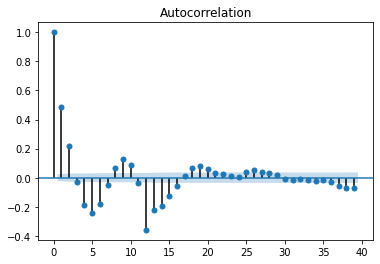

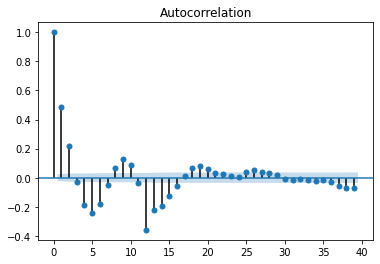

In [190]:
plot_acf(ustricit_copy['12_temp_diff'].dropna())


acf value is around 3

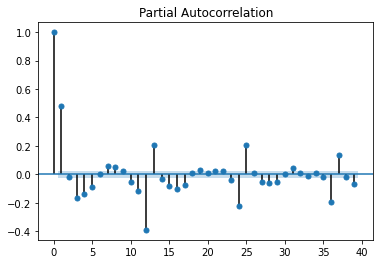

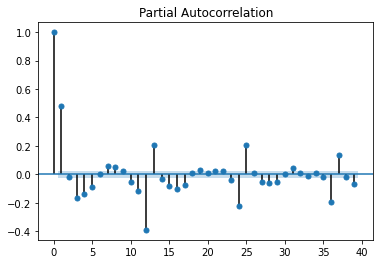

In [191]:
plot_pacf(ustricit_copy['12_temp_diff'].dropna())

pcf value is around 2

## **ARIMA model training and predicting**

In [192]:
ustricit_copy.isna().sum()

12_temp_diff    0
dtype: int64

In [193]:
utrain = ustricit_copy[:6000]
utest = ustricit_copy[6000:]

In [194]:
from statsmodels.tsa.arima_model import ARIMA

In [195]:
uarima = ARIMA(utrain, order=(2,1,3))
#order is p, d, q
umdl = uarima.fit()

predicting the temperatures using the model

In [196]:
upred = umdl.forecast(steps=len(utest))[0]

fiding the error between test data and predicted data

In [198]:
np.sqrt(mserror(utest, upred))

1.5120415308300965

error of arima model (1.5) is less than error of moving average (2.14)

In [201]:
mn = float('inf')
bestord = (-1,-1,-1)
for p in range(4):
    for d in range(3):
        for q in range(4):
            try:
                order = (p,q,d)
                arima = ARIMA(utrain, order)
                model = arima.fit()
                pred = model.forecast(steps=len(utest))[0]
                err = np.sqrt(mserror(utest, pred))
                print(f'error of {err}, for order {order}')
                if err < mn:
                    mn = err
                    bestord = order
            except:
                continue

print(f'\n least error is {mn} for order {bestord}')

error of 1.5111826257788996, for order (0, 0, 0)
error of 1.6051616014382584, for order (0, 1, 0)
error of 958.8565826451317, for order (0, 2, 0)
error of 1.5109775735752817, for order (0, 0, 1)
error of 1.5290937280652082, for order (0, 1, 1)
error of 1.8930762451097725, for order (0, 2, 1)
error of 1.5112018292660985, for order (0, 0, 2)
error of 1.5109454448377297, for order (0, 1, 2)
error of 1.511151439527018, for order (1, 0, 0)
error of 1.5348587945702663, for order (1, 1, 0)
error of 198.65937444218568, for order (1, 2, 0)
error of 1.511140022909095, for order (1, 0, 1)
error of 1.5111223091543395, for order (1, 1, 1)
error of 1.5112070981217158, for order (1, 0, 2)
error of 1.5111101492773862, for order (1, 1, 2)
error of 1.5111328672659643, for order (2, 0, 0)
error of 1.5375566332979504, for order (2, 1, 0)
error of 231.01117023140063, for order (2, 2, 0)
error of 1.5109472031519602, for order (2, 0, 1)
error of 1.5111072899430409, for order (2, 1, 1)
error of 1.759449100266

So we shall train the model with be most efficient order

In [202]:
arima = ARIMA(utrain,order=(2,1,2))
model = arima.fit()
pred = model.forecast(len(utest))[0]

In [203]:
np.sqrt(mserror(utest, pred))

1.5108850965733327